In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
dataset_path = "C:\CK+48"

# Create empty lists to store file paths and labels
file_paths = []
labels = []

# Loop through each class folder and its images
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            file_paths.append(image_path)
            labels.append(class_name)

# Create a DataFrame from the lists
df = pd.DataFrame({'file_path': file_paths, 'label': labels})
df.head()

,file_path,label
0,C:\CK+48\anger\S010_004_00000017.png,anger
1,C:\CK+48\anger\S010_004_00000018.png,anger
2,C:\CK+48\anger\S010_004_00000019.png,anger
3,C:\CK+48\anger\S011_004_00000019.png,anger
4,C:\CK+48\anger\S011_004_00000020.png,anger


In [3]:
df.to_csv("image_dataset.csv", index=False)
df.head()

,file_path,label
0,C:\CK+48\anger\S010_004_00000017.png,anger
1,C:\CK+48\anger\S010_004_00000018.png,anger
2,C:\CK+48\anger\S010_004_00000019.png,anger
3,C:\CK+48\anger\S011_004_00000019.png,anger
4,C:\CK+48\anger\S011_004_00000020.png,anger


In [4]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
# Load the DataFrame
df = pd.read_csv("image_dataset.csv")

# Preprocess the images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(48, 48))
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to the range [0, 1]
    return img_array

# Load and preprocess images
df['image_data'] = df['file_path'].apply(preprocess_image)

# Convert labels to numerical format (if needed)
# For example, if labels are 'cat' and 'dog', you can convert them to 0 and 1:
label_mapping = {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6, }
df['label'] = df['label'].map(label_mapping)

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert the image_data and label columns into numpy arrays
X_train = np.array(train_df['image_data'].tolist())
y_train = np.array(train_df['label'])

X_val = np.array(val_df['image_data'].tolist())
y_val = np.array(val_df['label'])

In [5]:
y_train[:1000]

array([6, 4, 6, 0, 0, 6, 2, 6, 4, 2, 2, 6, 2, 0, 6, 0, 4, 6, 0, 6, 2, 4,
       4, 5, 6, 0, 0, 3, 4, 2, 2, 4, 0, 0, 4, 6, 3, 4, 0, 4, 2, 2, 4, 6,
       4, 2, 6, 0, 0, 0, 3, 2, 4, 2, 4, 4, 4, 2, 0, 6, 2, 4, 4, 2, 4, 0,
       2, 6, 5, 2, 2, 2, 5, 4, 3, 2, 6, 2, 6, 4, 3, 6, 4, 2, 6, 0, 1, 4,
       3, 6, 3, 6, 4, 6, 4, 6, 6, 4, 4, 6, 6, 3, 2, 2, 5, 2, 0, 1, 2, 6,
       6, 4, 6, 2, 0, 4, 2, 4, 3, 0, 2, 5, 4, 6, 4, 6, 4, 1, 0, 4, 4, 6,
       0, 6, 1, 2, 6, 0, 2, 0, 2, 5, 2, 1, 6, 5, 1, 6, 1, 0, 6, 2, 4, 6,
       1, 6, 1, 1, 0, 4, 4, 0, 5, 3, 2, 1, 6, 2, 2, 4, 4, 0, 6, 6, 1, 0,
       6, 0, 6, 0, 4, 5, 4, 6, 0, 3, 4, 5, 5, 6, 2, 0, 4, 4, 6, 4, 2, 4,
       5, 4, 6, 5, 0, 5, 6, 4, 5, 3, 0, 0, 4, 2, 2, 2, 2, 6, 2, 0, 1, 3,
       4, 4, 2, 6, 5, 4, 4, 6, 4, 1, 6, 4, 4, 5, 4, 1, 2, 6, 6, 5, 3, 3,
       0, 0, 6, 4, 3, 0, 0, 3, 4, 3, 0, 6, 0, 2, 6, 6, 6, 4, 4, 4, 0, 0,
       3, 4, 0, 0, 2, 1, 4, 6, 4, 6, 0, 3, 1, 4, 3, 6, 6, 6, 1, 3, 5, 6,
       6, 5, 3, 6, 2, 4, 2, 4, 0, 0, 6, 6, 2, 4, 6,

In [6]:
classes = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [7]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

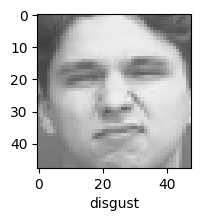

In [13]:
plot_sample(X_train, y_train,10)

In [9]:
# X_train = X_train / 255.0
# X_val = X_val / 255.0

In [10]:
ann = models.Sequential([
            layers.Flatten(input_shape=(48,48,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(7, activation='softmax'),
        ])


ann.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
ann.fit(X_train, y_train, epochs=40)

Epoch 1/40
25/25 [==============================] - 3s 109ms/step - loss: 2.0522 - accuracy: 0.3278
Epoch 2/40
25/25 [==============================] - 3s 108ms/step - loss: 1.5613 - accuracy: 0.4286
Epoch 3/40
25/25 [==============================] - 3s 123ms/step - loss: 1.2714 - accuracy: 0.5332
Epoch 4/40
25/25 [==============================] - 3s 119ms/step - loss: 1.1750 - accuracy: 0.5689
Epoch 5/40
25/25 [==============================] - 3s 129ms/step - loss: 0.9856 - accuracy: 0.6492
Epoch 6/40
25/25 [==============================] - 3s 123ms/step - loss: 0.9844 - accuracy: 0.6531
Epoch 7/40
25/25 [==============================] - 3s 121ms/step - loss: 0.9678 - accuracy: 0.6696
Epoch 8/40
25/25 [==============================] - 3s 120ms/step - loss: 0.7396 - accuracy: 0.7628
Epoch 9/40
25/25 [==============================] - 3s 118ms/step - loss: 0.7360 - accuracy: 0.7551
Epoch 10/40
25/25 [==============================] - 3s 116ms/step - loss: 0.7076 - accuracy: 0.7653

In [11]:
ann.evaluate(X_val,y_val)

7/7 [==============================] - 0s 32ms/step - loss: 0.2227 - accuracy: 0.9289


[0.22267906367778778, 0.9289340376853943]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_val)
classs = [np.argmax(element) for element in y_pred] 
print('classification_report:  \n', classification_report(y_val,classs))

classification_report:  
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       1.00      1.00      1.00         9
           2       0.93      1.00      0.97        43
           3       1.00      0.93      0.97        15
           4       1.00      0.95      0.98        43
           5       0.65      0.89      0.76        19
           6       0.96      0.96      0.96        45

    accuracy                           0.93       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.94      0.93      0.93       197

